In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from utils import utils
import rdkit
from rdkit import Chem
from utils.utils import moltosvg
from utils.utils import makedirs
import os

In [16]:
main = pd.read_csv(r"./data/cosn_mek_thf.csv")

In [17]:
main['full_smiles'] = [str(solute) + "." + str(solvent) for (solute, solvent) in zip(main['solute_smiles'], main['solvent_smiles'])]

In [21]:
# main['measured_rejection'] = np.divide(main['measured_rejection'], 100)

In [18]:
main.to_csv('./data/cosn_mek_thf.csv')

c:\Users\ignaczg\Anaconda3\envs\cuda-torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


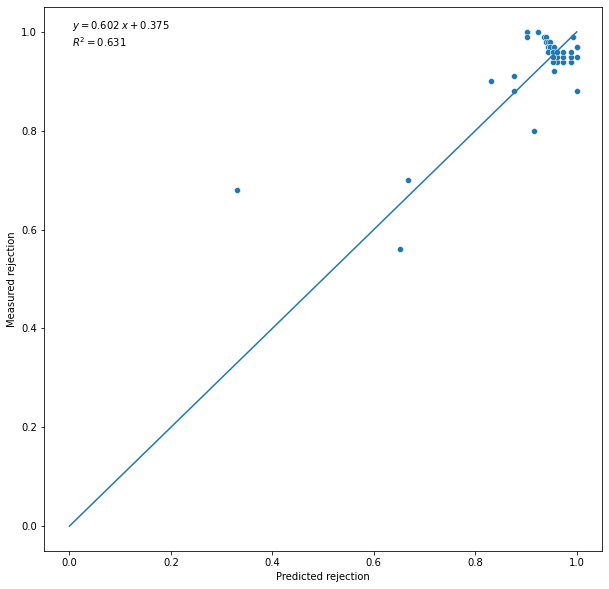

In [2]:
main = pd.read_csv('./data/predictions/cosn_predicted_final.csv')
main.rename(columns={'measured_rejection2':'measured_rejection'}, inplace=True)
main['dm300'].mask(main['dm300'] > 1., 1., inplace=True)
plt.figure(figsize=(10,10))
sns.scatterplot(main['dm300'], main['measured_rejection'], data=main)
plt.plot([0,1], [0,1], '')
# plt.ylim(0,100)
# plt.xlim(0,1)
plt.ylabel('Measured rejection')
plt.xlabel('Predicted rejection')


z = np.polyfit(main['dm300'], main['measured_rejection'], 1)
p = np.poly1d(z)
y_hat = np.poly1d(z)(main['dm300'])

r_square = r2_score(main['measured_rejection'], y_hat)
#plt.plot(main['dm300'],p(main['dm300']),"-")
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(main['measured_rejection'],y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
        fontsize=10, verticalalignment='center', horizontalalignment='left')
plt.show()

In [19]:
import chemprop
arguments = [
    '--test_path',  './data/cosn_mek_thf.csv',
    '--preds_path', './data/predictions/cosn_final_predicted_mek_thf.csv',
    '--checkpoint_dir', './data/train_results/hyperopt/10_fold/',
    '--smiles_column', 'full_smiles'
    ]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)


Loading training args
Setting molecule featurization parameters to default.
Loading data


103it [00:00, 34341.28it/s]
100%|██████████| 103/103 [00:00<00:00, 95917.70it/s]


Validating SMILES
Test size = 102
Predicting with an ensemble of 10 models


  0%|          | 0/10 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 10%|█         | 1/10 [00:47<07:09, 47.77s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 20%|██        | 2/10 [01:38<06:34, 49.36s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 30%|███       | 3/10 [02:24<05:35, 47.87s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 40%|████      | 4/10 [03:05<04:31, 45.29s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 50%|█████     | 5/10 [03:48<03:42, 44.58s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 60%|██████    | 6/10 [04:30<02:54, 43.69s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 70%|███████   | 7/10 [05:15<02:11, 43.97s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 80%|████████  | 8/10 [06:04<01:31, 45.59s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


 90%|█████████ | 9/10 [06:53<00:46, 46.66s/it]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda


100%|██████████| 10/10 [07:35<00:00, 45.55s/it]

Saving predictions to ./data/predictions/cosn_final_predicted_mek_thf.csv
Elapsed time = 0:07:36


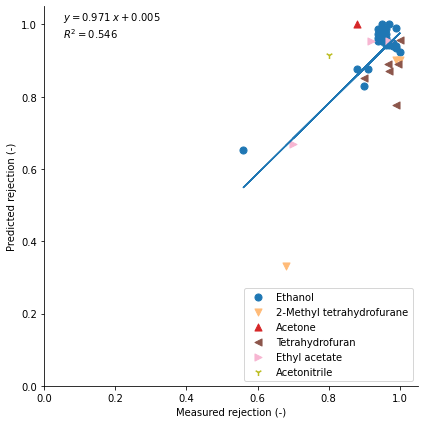

In [28]:
main = pd.read_csv('./data/predictions/cosn_final_predicted_mek_thf.csv')
# main.rename(columns={'measured_rejection2':'measured_rejection'}, inplace=True)
main['dm300'].mask(main['dm300'] > 1., 1., inplace=True)

utils.rejection_diagram(y='dm300', 
                        x='measured_rejection2', 
                        data=main, group='solvent_name', 
                        y_axis='Predicted rejection (-)', 
                        x_axis='Measured rejection (-)',
                        save='./figures/literature_generalization_mek_thf.svg')
plt.ylim(0.0,1.05)
plt.xlim(0.0,1.05)
# plt.plot([0,1], [0,1], '')
plt.show()

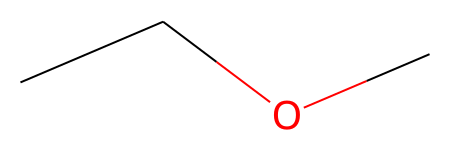

In [4]:
smiles = 'CCOC'
mol = Chem.MolFromSmiles(smiles)

In [5]:
main = pd.read_csv('./data/predictions/cosn_predicted_final.csv')

In [7]:
mol = Chem.MolFromSmiles(main['full_smiles'][0])

In [14]:
# save_path = os.path.join(args.bayes_path, target_name)
# makedirs('./data/molecule_images/generalization/')

svg = moltosvg(mol)
with open(os.path.join('./data/molecule_images/generalization/', 'tubi_levi_molecule.svg'), 'w') as f:f.write(svg)